In [1]:
#importation des différents modules nécessaires
import pandas as pd
from __future__ import division
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
#importation du fichier
df = pd.read_csv("reg_simple.csv")

In [2]:
#selection de la première colonne de notre dataset en l'assignant à x
X = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset en l'assignant à y
Y = df.iloc[0:len(df),1] 

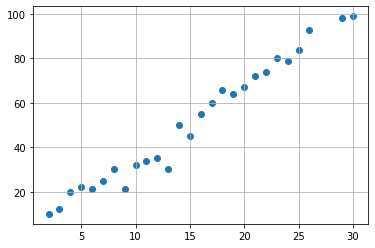

In [3]:
#création du nuage de points
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [4]:
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept

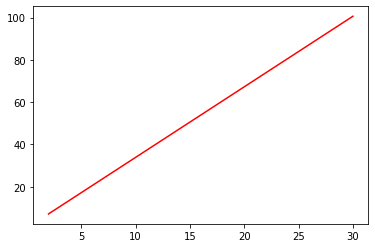

In [5]:
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

After 2000 iterations theta_0 = 0.18398821349681185, theta_1 = 3.3534598221366703


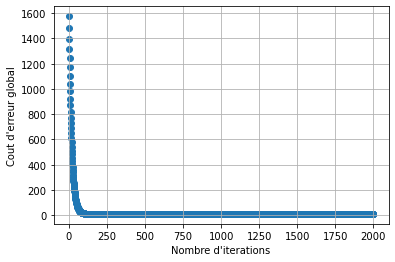

In [6]:
def calculer_cost_function(theta_0, theta_1):
    global_cost  = 0
    for i in range(len(X)):
        cost_i = ((theta_0 + (theta_1 * X[i])) - Y[i]) * ((theta_0 + (theta_1 * X[i])) - Y[i]) 
        global_cost+= cost_i
    return (1/ (2 * len(X))) * global_cost

#un tableau pour stocker les valeurs d'erreurs global à chaque tour d'itération
COST_RECORDER = []

# la taille de notre ensemble de données d'apprentissage
M = len(X)

learning_rate_ALPHA = float(0.0001)
initial_theta_0 = float(0)
initial_theta_1 = float(0)
nombre_iterations = 2000

def calculer_derivees_partielles(ancien_theta_0, ancien_theta_1):
    derivee_theta_0 = float(0)
    derivee_theta_1 = float(0)
    for i in range(0, len(X)):
        derivee_theta_0 += float(((ancien_theta_0 + (ancien_theta_1 * X[i])) - float(Y[i])))
        derivee_theta_1 += (((ancien_theta_0 + (ancien_theta_1 * X[i]))) - float(Y[i])) * float(X[i])  
    derivee_theta_0 = (1/M) * derivee_theta_0
    derivee_theta_1 = (1/M) * derivee_theta_1
    return [derivee_theta_0, derivee_theta_1]

def calculer_nouvelles_theta(ancien_theta_0, ancien_theta_1):
    [derivee_theta_0, derivee_theta_1] = calculer_derivees_partielles(ancien_theta_0,ancien_theta_1)
    nouvelle_theta_0 = ancien_theta_0 - (learning_rate_ALPHA * derivee_theta_0)
    nouvelle_theta_1 = ancien_theta_1 - (learning_rate_ALPHA * derivee_theta_1)
    COST_RECORDER.append(calculer_cost_function(nouvelle_theta_0, nouvelle_theta_1))
    return [nouvelle_theta_0,nouvelle_theta_1]

def lancer_gradient_descent():
    tmp_theta_0 = initial_theta_0
    tmp_theta_1 = initial_theta_1   
    for i in range(nombre_iterations):
        [nouvelle_theta_0, nouvelle_theta_1] = calculer_nouvelles_theta(tmp_theta_0, tmp_theta_1)
        tmp_theta_0 = nouvelle_theta_0
        tmp_theta_1 = nouvelle_theta_1
    return [tmp_theta_0, tmp_theta_1]         

[final_theta_0, final_theta_1] = lancer_gradient_descent()

print ("After {0} iterations theta_0 = {1}, theta_1 = {2}".format(nombre_iterations, final_theta_0, final_theta_1))

#print COST_RECORDER

xx = []; yy=[]

#dessiner l'avancer des differents de J(theta_0, theta_1)
for i in range(len(COST_RECORDER)):
    xx.append(i)
    yy.append(COST_RECORDER[i])

axes = plt.axes()
axes.grid()
plt.xlabel('Nombre d\'iterations')
plt.ylabel('Cout d\'erreur global')
plt.scatter(xx,yy)
plt.show()

# Régression linéaire multiple :

In [11]:
#importation des necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#fichier
df = pd.read_csv("boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
#déf de x
X = df.iloc[1:len(df),2]
#def de y
Y = df.iloc[2:len(df),3] 